In [0]:
# File location and type
file_location = "/FileStore/tables/WA_Fn_UseC__Telco_Customer_Churn.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option('nanValue', ' ')\
  .option('nullValue', ' ')\
  .load(file_location)

df.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService| MultipleLines|InternetService| OnlineSecurity| OnlineBackup| DeviceProtection| TechSupport| StreamingTV| StreamingMovies| Contract|PaperlessBilling| PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
7590-VHVEG|Female| 0| Yes| No| 1| No|No phone service| DSL| No| Yes| No| No| No| No|Month-to-month| Yes| Electronic check| 29.85| 29.85| No|
5575-GNVDE| Male| 0| No| No| 34| Yes| No| DSL| Yes| No| Yes| No| No| No| One year| No| Mailed check| 56.95| 1889.5| No|
3668-QPYBK| Male| 0| No| No| 2| Yes| No| DSL| Yes| Yes| No| No| No| No|Month-to-month| Yes| Mailed check| 53.85| 108.15| Yes|
7795-CFOCW| Male| 0| No| No| 45| No|No phone service| DSL| Yes| No| Yes| Yes| No| No| One year| No|Bank transfer (au...| 42.3| 1840.75| No|
9237-HQITU|Female| 0| No| No| 2| Yes| No| Fiber optic| No| No| No| No| No| No|Month-to-month| Yes| Electronic check| 70.7| 151.65| Yes|
9305-CDSKC|Female| 0| No| No| 8| Yes| Yes| Fiber optic| No| No| Yes| No| Yes| Yes|Month-to-month| Yes| Electronic check| 99.65| 820.5| Yes|
1452-KIOVK| Male| 0| No| Yes| 22| Yes| Yes| Fiber optic| No| Yes| No| No| Yes| No|Month-to-month| Yes|Credit card (auto...| 89.1| 1949.4| No|
6713-OKOMC|Female| 0| No| No| 10| No|No phone service| DSL| Yes| No| No| No| No| No|Month-to-month| No| Mailed check| 29.75| 301.9| No|
7892-POOKP|Female| 0| Yes| No| 28| Yes| Yes| Fiber optic| No| No| Yes| Yes| Yes| Yes|Month-to-month| Yes| Electronic check| 104.8| 3046.05| Yes|
6388-TABGU| Male| 0| No| Yes| 62| Yes| No| DSL| Yes| Yes| No| No| No| No| One year| No|Bank transfer (au...| 56.15| 3487.95| No|
9763-GRSKD| Male| 0| Yes| Yes| 13| Yes| No| DSL| Yes| No| No| No| No| No|Month-to-month| Yes| Mailed check| 49.95| 587.45| No|
7469-LKBCI| Male| 0| No| No| 16| Yes| No| No|No internet service|No internet service|No internet service|No internet service|No internet service|No internet service| Two year| No|Credit card (auto...| 18.95| 326.8| No|
8091-TTVAX| Male| 0| Yes| No| 58| Yes| Yes| Fiber optic| No| No| Yes| No| Yes| Yes| One year| No|Credit card (auto...| 100.35| 5681.1| No|
0280-XJGEX| Male| 0| No| No| 49| Yes| Yes| Fiber optic| No| Yes| Yes| No| Yes| Yes|Month-to-month| Yes|Bank transfer (au...| 103.7| 5036.3| Yes|
5129-JLPIS| Male| 0| No| No| 25| Yes| No| Fiber optic| Yes| No| Yes| Yes| Yes| Yes|Month-to-month| Yes| Electronic check| 105.5| 2686.05| No|
3655-SNQYZ|Female| 0| Yes| Yes| 69| Yes| Yes| Fiber optic| Yes| Yes| Yes| Yes| Yes| Yes| Two year| No|Credit card (auto...| 113.25| 7895.15| No|
8191-XWSZG|Female| 0| No| No| 52| Yes| No| No|No internet service|No internet service|No internet service|No internet service|No internet service|No internet service| One year| No| Mailed check| 20.65| 1022.95| No|
9959-WOFKT| Male| 0| No| Yes| 71| Yes| Yes| Fiber optic| Yes| No| Yes| No| Yes| Yes| Two year| No|Bank transfer (au...| 106.7| 7382.25| No|
4190-MFLUW|Female| 0| Yes| Yes| 10| Yes| No| DSL| No| No| Yes| Yes| No| No|Month-to-month| No|Credit card (auto...| 55.2| 528.35| Yes|
4183-MYFRB|Female| 0| No| No| 21| Yes| No| Fiber optic| No| Yes| Yes| No| No| Yes|Month-to-month| Yes| Electronic check| 90.05| 1862.9| No|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-----------------

In [0]:
df.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: double (nullable = true)
-- Churn: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 11| 0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+

In [0]:
# Create a view or table
temp_table_name = "churn_analysis"
df.createOrReplaceTempView(temp_table_name)

In [0]:
pd_df=df.toPandas()

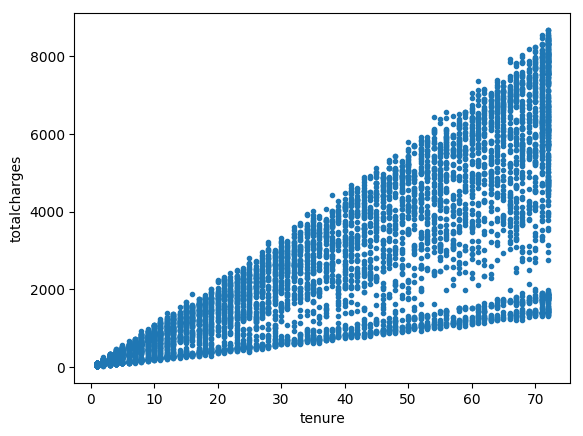

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'], pd_df['TotalCharges'], '.')
plt.xlabel('tenure')
plt.ylabel('totalcharges')
display()

In [0]:
# #From this we can infer that the dataset is highly imbalanced and hence we have to use some other metric during evaluation other than Accuracy.
df.groupBy('Churn').count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 5174|
 Yes| 1869|
+-----+-----+

In [0]:
df.select('tenure','TotalCharges','MonthlyCharges').describe().show()

+-------+------------------+------------------+------------------+
summary| tenure| TotalCharges| MonthlyCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7032| 7043|
 mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
 stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
 min| 0| 18.8| 18.25|
 max| 72| 8684.8| 118.75|
+-------+------------------+------------------+------------------+

In [0]:
%sql
select gender, churn, count(*) from churn_analysis group by gender, churn

gender,churn,count(1)
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


In [0]:
%sql
select SeniorCitizen, churn, count(*) from churn_analysis group by SeniorCitizen, churn

SeniorCitizen,churn,count(1)
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


In [0]:
# # The customers tend to churn out as the tenure increases. May be the telecom companies offer attractive offers in the start and then charge high.
%sql
select cast(tenure as int), churn, count(churn) from churn_analysis group by tenure, churn order by cast(tenure as int)

tenure,churn,count(churn)
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,No,106
3,Yes,94
4,No,93
4,Yes,83
5,No,69


In [0]:
df.stat.crosstab("SeniorCitizen", "InternetService").show()

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
df.stat.freqItems(["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], 0.6).collect()

Out[10]: [Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], OnlineBackup_freqItems=['Yes'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [0]:
%sql
select PaperlessBilling, churn, count(*) from churn_analysis group by PaperlessBilling, churn

PaperlessBilling,churn,count(1)
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


In [0]:
%sql
select PaymentMethod, churn, count(*) from churn_analysis group by PaymentMethod, churn

PaymentMethod,churn,count(1)
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


In [0]:
churn_df = df
(train_data, test_data) = churn_df.randomSplit([0.7, 0.3], 24)

print("Records for training: " + str(train_data.count()))
print("Records for evaluation: " + str(test_data.count()))

Records for training: 4916
Records for evaluation: 2127

In [0]:
#https://spark.apache.org/docs/latest/ml-features#quantilediscretizer
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

catColumns = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

In [0]:
stages= []
for catCol in catColumns:
    stringIndexer = StringIndexer(inputCol=catCol, outputCol=catCol + "Index")
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[catCol + "catVec"])
    stages += [stringIndexer, encoder]

In [0]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["TotalCharges"], outputCols=["Out_TotalCharges"])
stages += [imputer]

In [0]:
label_Idx = StringIndexer(inputCol="Churn", outputCol="label")
stages += [label_Idx]

In [0]:
df.stat.corr('TotalCharges', 'MonthlyCharges')

Out[16]: 0.6511738315787813

In [0]:
%sql
select cast(tenure as int), churn, count(*) as churned from churn_analysis where churn='Yes' group by tenure, churn order by cast(tenure as int)

tenure,churn,churned
1,Yes,380
2,Yes,123
3,Yes,94
4,Yes,83
5,Yes,64
6,Yes,40
7,Yes,51
8,Yes,42
9,Yes,46
10,Yes,45


In [0]:
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(numBuckets=3, inputCol="tenure", outputCol="tenure_bin")
stages += [tenure_bin]

In [0]:
numericCols = ["tenure_bin", "Out_TotalCharges","MonthlyCharges"]
assembleInputs = [c + "catVec" for c in catColumns] + numericCols
assembler = VectorAssembler(inputCols=assembleInputs, outputCol="features")
stages += [assembler]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [0]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[21]: [Row(customerID='0004-TLHLJ', gender='Male', SeniorCitizen=0, Partner='No', Dependents='No', tenure=4, PhoneService='Yes', MultipleLines='No', InternetService='Fiber optic', OnlineSecurity='No', OnlineBackup='No', DeviceProtection='Yes', TechSupport='No', StreamingTV='No', StreamingMovies='No', Contract='Month-to-month', PaperlessBilling='Yes', PaymentMethod='Electronic check', MonthlyCharges=73.9, TotalCharges=280.85, Churn='Yes', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=0.0, PartnercatVec=SparseVector(1, {0: 1.0}), DependentsIndex=0.0, DependentscatVec=SparseVector(1, {0: 1.0}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=0.0, InternetServicecatVec=SparseVector(2, {0: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=0.0, OnlineBackupcatVec=SparseVector(2, {0: 1.0}), DeviceProtectionIndex=1.0, DeviceProtectioncatVec=SparseVector(2, {1: 1.0}), TechSupportIndex=0.0, TechSupportcatVec=SparseVector(2, {0: 1.0}), StreamingTVIndex=0.0, StreamingTVcatVec=SparseVector(2, {0: 1.0}), StreamingMoviesIndex=0.0, StreamingMoviescatVec=SparseVector(2, {0: 1.0}), ContractIndex=0.0, ContractcatVec=SparseVector(2, {0: 1.0}), PaperlessBillingIndex=0.0, PaperlessBillingcatVec=SparseVector(1, {0: 1.0}), PaymentMethodIndex=0.0, PaymentMethodcatVec=SparseVector(3, {0: 1.0}), Out_TotalCharges=280.85, label=1.0, tenure_bin=0.0, features=SparseVector(30, {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0, 14: 1.0, 15: 1.0, 17: 1.0, 19: 1.0, 21: 1.0, 23: 1.0, 24: 1.0, 28: 280.85, 29: 73.9}))]

In [0]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainprepDF)

In [0]:
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [-0.022125908958674088,-0.2959666028531403,-0.04540190713044164,0.11422451989175891,-0.5443650552564756,-0.2578717959455513,0.06759355518729313,0.5589400869146011,-0.3986256243196871,0.30003152767252406,-0.134954906292892,0.1906494657387728,0.003426387983986442,0.11393776372551714,0.08647003066023518,0.26398039586831756,-0.0886629995806309,0.005764718914013294,0.19468869632082145,-0.012545144725578933,0.212492517490871,0.7226916232199253,-0.7941298473778357,0.3045835782392517,0.18868980558464638,-0.11391177062150903,-0.27808713414588604,-0.6330144913097796,-0.00011781853833584475,0.004850253631019683]
Intercept: -1.1241531294140918

In [0]:
summary=lrModel.summary

In [0]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAreaUnderROC: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall, summary.areaUnderROC))

Accuracy: 0.7971928397070789
FPR: 0.3543249783512605
TPR: 0.7971928397070789
F-measure: 0.7916719573031158
Precision: 0.7893734580163737
Recall: 0.7971928397070789
AreaUnderROC: 0.8462856449884067

In [0]:
display(lrModel, trainprepDF, "ROC")

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.8331148512857078
0.0,0.038461538461538464,0.8331148512857078
0.015384615384615385,0.038461538461538464,0.7797057517363821
0.015384615384615385,0.07692307692307693,0.7586357194568448
0.015384615384615385,0.11538461538461539,0.6987165453214434
0.03076923076923077,0.11538461538461539,0.6915118402949202
0.03076923076923077,0.15384615384615385,0.6860604944548899
0.046153846153846156,0.15384615384615385,0.6450038522648787
0.046153846153846156,0.19230769230769232,0.6429123845502271
0.046153846153846156,0.23076923076923078,0.6295249580338602


In [0]:
#https://spark.apache.org/docs/latest/api/python/_modules/pyspark/ml/evaluation.html
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(testprepDF)
#What is the use of rawPredictionCol="prediction" 
# https://medium.com/@rickykim78/hey-vijay-i-havent-declared-the-rawprediction-column-65de40d80cba
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction")
area_under_curve = evaluatorLR.evaluate(predictions)
area_under_PR =  evaluatorLR.evaluate(predictions, {evaluatorLR.metricName: "areaUnderPR"})
#default evaluation is areaUnderROC
print("areaUnderROC = %g" % area_under_curve)
print("areaUnderPR = %g" % area_under_PR)

areaUnderROC = 0.723089
areaUnderPR = 0.526439

In [0]:
#https://people.eecs.berkeley.edu/~jegonzal/pyspark/_modules/pyspark/mllib/evaluation.html
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# We need score and label to calculate the metrics i.e (prediction and label).
results = predictions.select(['prediction', 'label'])
 
# The input parameter to the BinaryClassificationMetrics class is of the form (prediction, label) so we have to form it in the given format for example:
# (0.1, 0.0), (0.1, 1.0), (0.4, 0.0), (0.6, 0.0), (0.6, 1.0), (0.6, 1.0), (0.8, 1.0)], 2)

results_collect = results.collect()
results_list = [(float(i[0]), float(i[1])) for i in results_collect]

# We parallelize because the input should be of the form of RDD.

predictionAndLabels = sc.parallelize(results_list)
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under PR = 0.5264394725677182
Area under ROC = 0.7230887671429083

In [0]:
results.show(5)

+----------+-----+
prediction|label|
+----------+-----+
 0.0| 0.0|
 0.0| 0.0|
 1.0| 1.0|
 0.0| 0.0|
 0.0| 0.0|
+----------+-----+
only showing top 5 rows

In [0]:
# The BinaryClassificationMetrics does not give any details about the Acc, precision and recall so we will hand code it.
count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Correct Predictions: %s\nWrong Predictions: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s"
      % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))


Correct Predictions: 1707
Wrong Predictions: 420
tp: 296
fp: 194
fn: 226
tn: 1411
Accuracy: 0.8025387870239774
Precision: 0.6040816326530613
Recall: 0.5670498084291188

In [0]:
# We will try to enhance the metrics using grid search and cross validator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0, 5.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [5, 10, 20, 25])
             .build())

In [0]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluatorLR, numFolds=5)
# Run cross validations
cvModel = cv.fit(trainprepDF)

/databricks/spark/python/pyspark/ml/util.py:791: UserWarning: Can not find mlflow. To enable mlflow logging, install MLflow library from PyPi.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
predictions = cvModel.bestModel.transform(testprepDF)

In [0]:
evaluatorLR.evaluate(predictions)

Out[35]: 0.7230189422422745

In [0]:
results = predictions.select(['prediction', 'label'])

count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s"
      % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))


Correct: 1713
Wrong: 414
tp: 293
fp: 185
fn: 229
tn: 1420
Accuracy: 0.8053596614950634
Precision: 0.6129707112970711
Recall: 0.5613026819923371

In [0]:
from pyspark.ml.classification import RandomForestClassifier
#https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features").setImpurity("gini").setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy("auto").setSeed(1010)

rfModel = rf.fit(trainprepDF)

In [0]:
predictions = rfModel.transform(testprepDF)

In [0]:
def custom_evaluator(predictions, labels):
  count=predictions.count()
  correct = results.filter(results.prediction == results.label).count()
  wrong = results.filter(results.prediction != results.label).count()
  tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
  fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
  fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
  tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

  accuracy = (tp+tn)/count
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  
  return correct, wrong, tp, fp, fn, tn, accuracy, precision, recall

In [0]:
results = predictions.select(['prediction', 'label'])

count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s"
      % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))


Correct: 1728
Wrong: 399
tp: 264
fp: 141
fn: 258
tn: 1464
Accuracy: 0.8124118476727785
Precision: 0.6518518518518519
Recall: 0.5057471264367817